## CSC 525 - Critical Thinking 3: Option 2
### Simple Polynomial Regression in Python

For your assignment, you will build a polynomial regression model in Python.

Please download the [Positions Salaries](https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv) dataset in CSV format: 
Using this data, our model should be able to predict the value of an employee candidate given their years of experience.

Consider using Google to conduct your own research for this assignment. Feel free to also use the following documentation and resources:

–	[Robust nonlinear regression in scipy  (Links to an external site.)](https://scipy-cookbook.readthedocs.io/items/robust_regression.html)
–	[Machine Learning: Polynomial Regression with Python  (Links to an external site.)](https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386)

Submission should include an executable Python file demonstrating the prediction of employee salary based on years of experience.

In [15]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data
PATH_TO_DATA = "position_salaries.csv"
df = pd.read_csv(PATH_TO_DATA)
print(df.head(5))

       Position  Level  Salary
0    Engineer I      1   71065
1   Engineer II      2   82355
2  Engineer III      3   98469
3   Engineer IV      4  118934
4    Engineer V      5  142296


In [35]:
# Split the data
X = df.iloc[:, 1:2].values # Get the year experience data

y = df.iloc[:, 2].values # Get the salary data

from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

[ 1  2  3  4  5  6  7  8  9 10]
(10, 1)


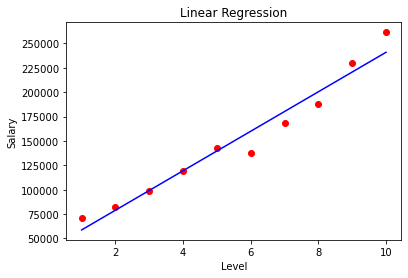

In [4]:
# Linear Regression model for comparison
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

# Visualization
plt.scatter(X, y, color='red')
plt.plot (X, lin_reg.predict(X), color='blue')
plt.title("Linear Regression")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

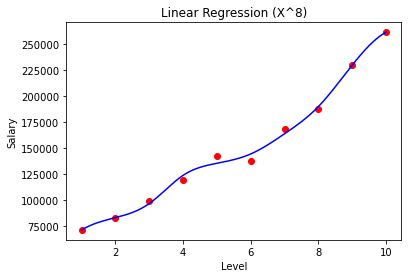

In [36]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import make_interp_spline
degree = 8
poly_reg = PolynomialFeatures(degree=degree)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

pol_preds = pol_reg.predict(X_poly)

X_Y_Spline = make_interp_spline(np.array(np.reshape(X, 10)), pol_preds)
X_ = np.linspace(np.array(X).min(), np.array(X).max(), 500)
Y_  = X_Y_Spline(X_)

plt.scatter(X, y, color='red')
plt.plot (X_, Y_, color='blue')
plt.title("Linear Regression (X^{})".format(degree))
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [20]:
preds = pol_reg.predict(X_poly)

pae_df = pd.DataFrame()
pae_df['predicted'] = preds
pae_df['actual'] = y
pae_df['error'] = pae_df['predicted'] - pae_df['actual']

pae_df.index.name = 'Position Level'
print(pae_df)

print("RMSE: {}".format(np.sqrt(sklearn.metrics.mean_squared_error(y, preds))))

                    predicted  actual         error
Position Level                                     
0                74857.618182   71065   3792.618182
1                84361.018182   82355   2006.018182
2                96549.933333   98469  -1919.066667
3               111424.363636  118934  -7509.636364
4               128984.309091  142296 -13311.690909
5               149229.769697  137185  12044.769697
6               172160.745455  168426   3734.745455
7               197777.236364  187891   9886.236364
8               226079.242424  230367  -4287.757576
9               257066.763636  261503  -4436.236364
RMSE: 7419.664142443823
